One nice aspect of the HealpixSlicer is that it can support lots of coordinate systems, and the metrics can be pulled out and visualized with the standard healpy tools as well

In [1]:
%matplotlib inline
import numpy as np
import healpy as hp
import lsst.sims.maf.db as db
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots

/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/astropy/config/configuration.py:427: AstropyDeprecationWarning: Config parameter 'name_resolve_timeout' in section [coordinates.name_resolve] of the file '/Users/yoachim/.astropy/config/astropy.cfg' is deprecated. Use 'remote_timeout' in section [utils.data] instead.
  AstropyDeprecationWarning)
/Users/yoachim/lsst/DarwinX86/miniconda2/3.19.0.lsst4/lib/python2.7/site-packages/astropy/config/configuration.py:442: AstropyDeprecationWarning: Config parameter 'remote_timeout' in section [utils.data] of the file '/Users/yoachim/.astropy/config/astropy.cfg' is given by more than one alias (astropy.utils.data.remote_t

In [2]:
opsdb = db.OpsimDatabase('enigma_1189_sqlite.db')
outDir = 'coordinates'

In [4]:
# let's just look at the number of observations in r-band after 2 years with default kwargs
sql = 'filter="r" and night < %i' % (365.25*2)
metric = metrics.CountMetric(col='expMJD')
slicer = slicers.HealpixSlicer()
plotDict = {'colorMax': 75}  # Set the max on the color bar so DD fields don't saturate
plotFuncs = [plots.HealpixSkyMap()] # only plot the sky maps for now
bundle = metricBundles.MetricBundle(metric, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [5]:
bg = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir)

Querying database with constraint filter="r" and night < 730
Found 97971 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" and night < 730 constraint now.
Plotting complete.


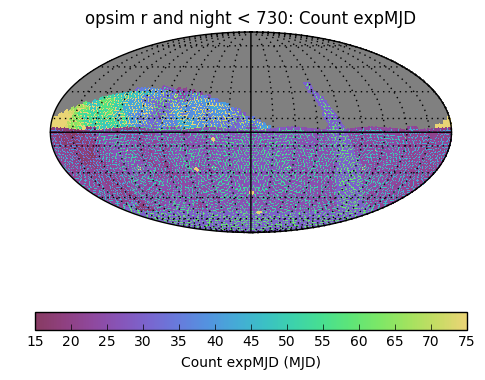

In [6]:
bg.runAll()
bg.plotAll(closefigs=False)

Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database with constraint filter="r" and night < 730
Found 97971 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" and night < 730 constraint now.
Plotting complete.


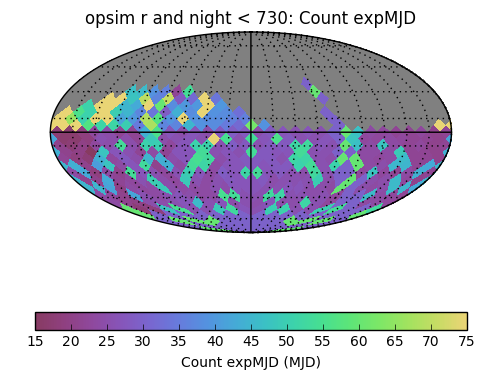

In [7]:
# Same, only now run at very low resolution
slicer = slicers.HealpixSlicer(nside=8)
bundle = metricBundles.MetricBundle(metric, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)
bg = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir)
bg.runAll()
bg.plotAll(closefigs=False)

One thing we often want to do is run with dithered positions rather than the default to get rid of the field overlap issue

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter="r" and night < 730
Found 97971 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" and night < 730 constraint now.
Plotting complete.


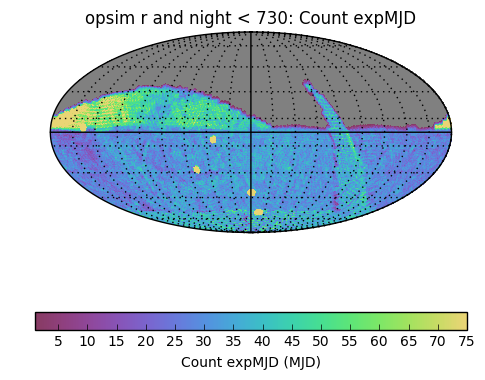

In [8]:
slicer = slicers.HealpixSlicer(latCol='ditheredDec', lonCol='ditheredRA')
bundle = metricBundles.MetricBundle(metric, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)
bg = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir)
bg.runAll()
bg.plotAll(closefigs=False)

Now let's try galactic and ecliptic coordiantes

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter="r" and night < 730
Found 97971 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" and night < 730 constraint now.
Plotting complete.


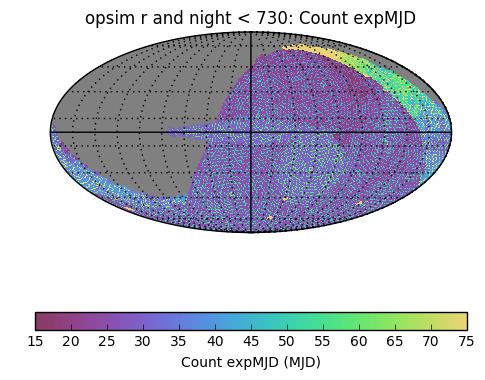

In [9]:
slicer = slicers.HealpixSlicer(latCol='galb', lonCol='gall')
bundle = metricBundles.MetricBundle(metric, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)
bg = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir)
bg.runAll()
bg.plotAll(closefigs=False)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter="r" and night < 730
Found 97971 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" and night < 730 constraint now.
Plotting complete.


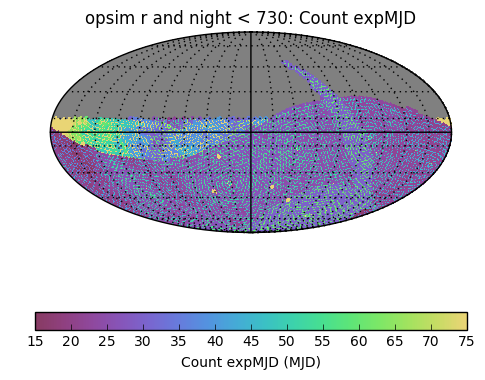

In [10]:
slicer = slicers.HealpixSlicer(latCol='eclipLat', lonCol='eclipLon')
bundle = metricBundles.MetricBundle(metric, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)
bg = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir)
bg.runAll()
bg.plotAll(closefigs=False)

Those coordinates are getting generated automatically by stackers. If we want to move the dithered positions to galactic coordinates, we have to set that manually like thus:

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter="r" and night < 730
Found 97971 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" and night < 730 constraint now.
Plotting complete.


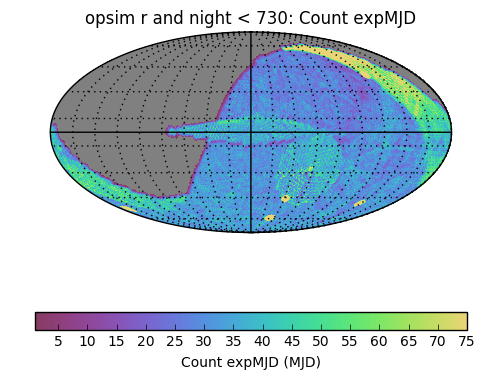

In [11]:
stacker = stackers.GalacticStacker(raCol='ditheredRA', decCol='ditheredDec')
slicer = slicers.HealpixSlicer(latCol='galb', lonCol='gall')
bundle = metricBundles.MetricBundle(metric, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs,
                                    stackerList=[stacker])
bg = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir)
bg.runAll()
bg.plotAll(closefigs=False)

One can also change things by using the rot plotting kwarg to rotate the projection. I never remember how to rotate from equatorial to galactic coords, but in theory, one could do it this way rather than using the stackers.

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter="r" and night < 730
Found 97971 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" and night < 730 constraint now.
Plotting complete.


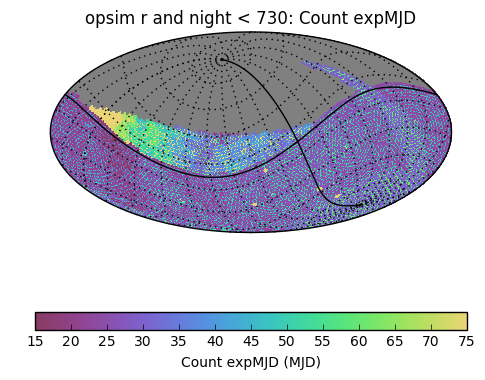

In [13]:
slicer = slicers.HealpixSlicer() # back the the default
plotDict = {'colorMax': 75, 'rot':(35, 26, 22.)}

bundle = metricBundles.MetricBundle(metric, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)
bg = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir)
bg.runAll()
bg.plotAll(closefigs=False)

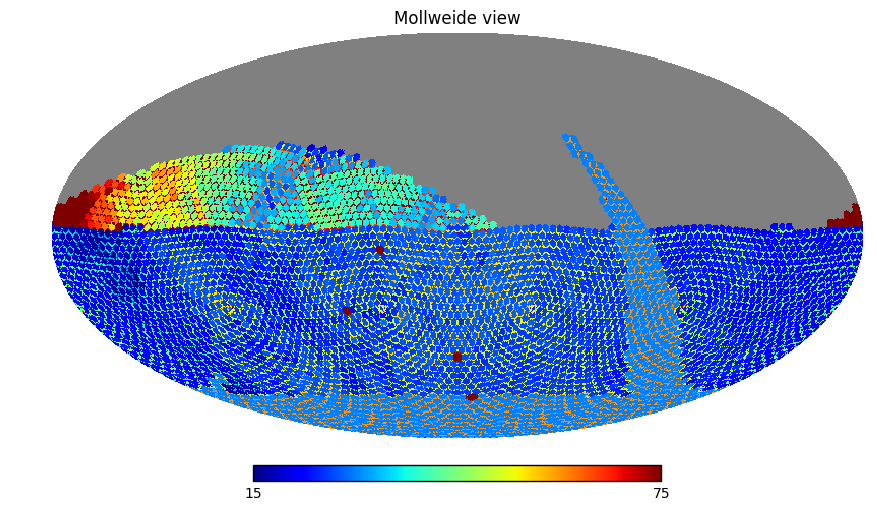

In [15]:
# Once can also use the healpy display tools:
hp.mollview(bundle.metricValues, max=75)

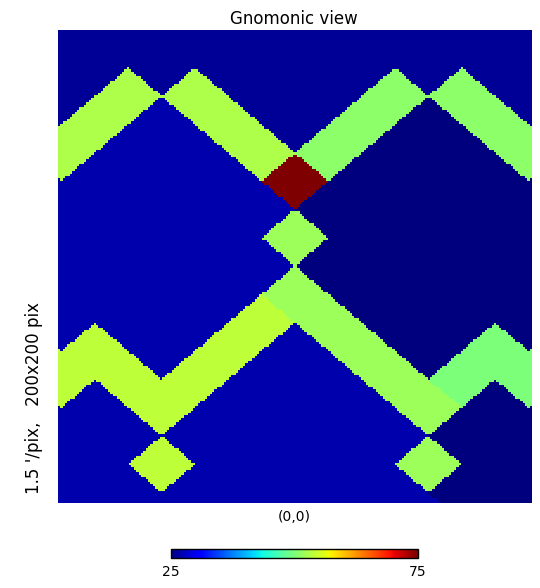

In [16]:
hp.gnomview(bundle.metricValues, max=75)

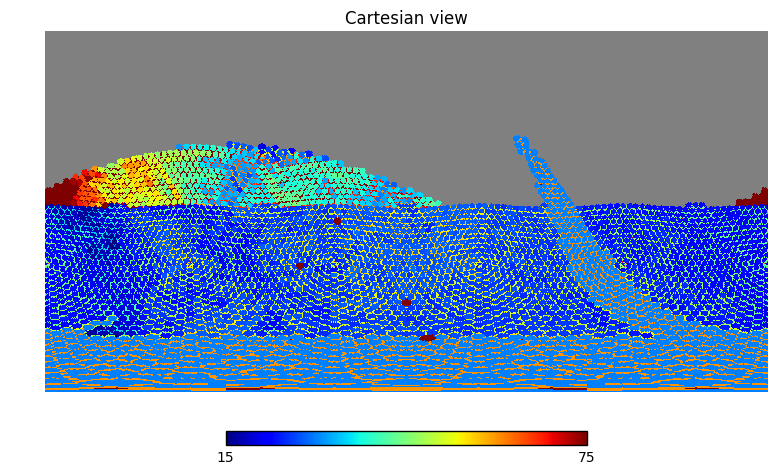

In [17]:
hp.cartview(bundle.metricValues, max=75)

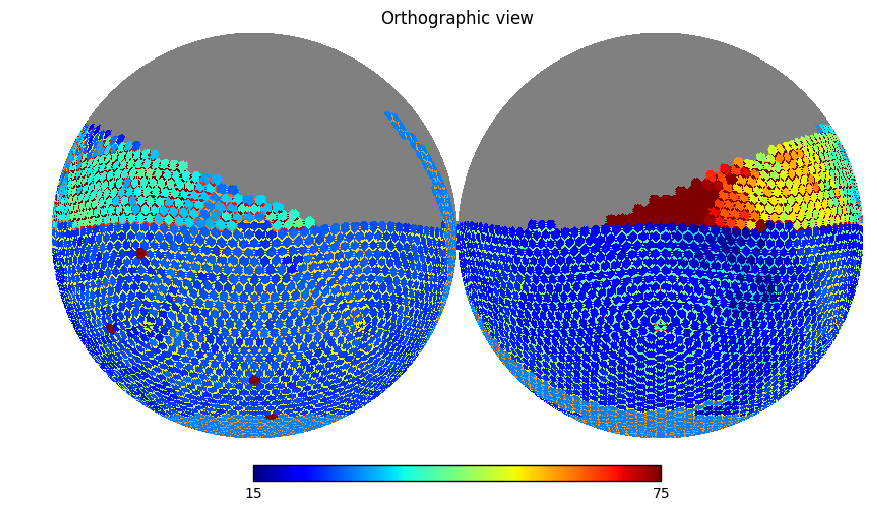

In [18]:
hp.orthview(bundle.metricValues, max=75)

And my personal favorite, looking at alt,az and using a special lambertian plotter.

NOTE: This plotter requires Basemap to run, which is not included by default in the LSST stack. To install:

`conda install basemap`

or

`pip install basemap`

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter="r" and night < 730
Found 97971 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" and night < 730 constraint now.
Plotting complete.


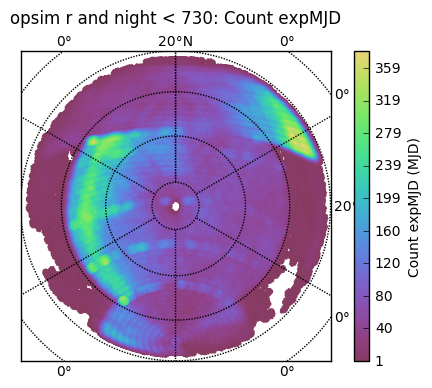

In [22]:
slicer = slicers.HealpixSlicer(latCol='zenithDistance', lonCol='azimuth')
plotFuncs=[plots.LambertSkyMap()]
plotDict = {}

bundle = metricBundles.MetricBundle(metric, slicer, sql, plotDict=plotDict, plotFuncs=plotFuncs)
bg = metricBundles.MetricBundleGroup({0:bundle}, opsdb, outDir=outDir)
bg.runAll()
bg.plotAll(closefigs=False)

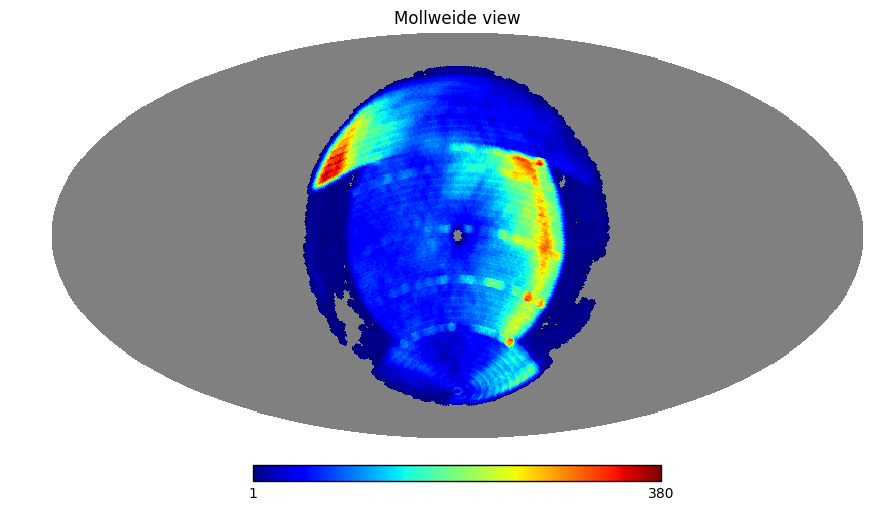

In [27]:
# and this is still a healpix array
hp.mollview(bundle.metricValues, rot=(0,90))